<a href="https://colab.research.google.com/github/southnt/colab/blob/main/Gen_Dicom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DICOM

*   DICOM Standard Browser: https://dicom.innolitics.com/ciods
*   dicom.nema: https://dicom.nema.org/medical/dicom/current/output/html/part01.html



# Shell - DCMTK

In [ ]:
!apt-get install -y dcmtk > /dev/null
!apt-get install p7zip-full > /dev/null

In [ ]:
%%shell
# check dicom tag
# https://manpages.debian.org/testing/dcmtk/dcmdump.1.en.html

dcmdump -v -d dicom.dcm

## Generator 1
Create N studies, each studies have M series, each series have L images

In [ ]:
%%shell
SECONDS=0

patientID="hashimoto" #@param {type:"string"}
patientName="nakamura" #@param {type:"string"}
studyFrom=1 #@param {type: "number"}
studyTo=10 #@param {type: "number"}
seriesFrom=1 #@param {type: "number"}
seriesTo=10 #@param {type: "number"}
instanceFrom=1 #@param {type: "number"}
instanceTo=100 #@param {type: "number"}
studyUID="1.2.3.4.5.69" #@param {type:"string"}
seriesUID=1.2.392.200036.9116.2.5.1.3268.2046999452.1437113808.3853 #@param {type:"string"}
instanceUID=1.2.392.200036.9116.2.5.1.3268.2046999452.1437113808.92107 #@param {type:"string"}
studyDate=20190614 #@param {type: "number"}
studyTime=010203  #@param {type: "number"}
birthDate=20150502 #@param {type: "number"}
modality="MR" #@param ["OT", "CT", "MR", "CR", "ES", "PT", "XA", "RF", "NM", "MG", "IO", "OP", "US", "ECG", "OPT", "OCT", "FS", "SC", "XC", "DX", "DR"] {allow-input: true}
bodyPart="HEAD" #@param ["HEAD", "LUNG", "CHEST", "LEGS", "ELBOW", "PELVIS", "SKULL"] {allow-input: true}
sex="F" #@param ["M", "F", "O"] {allow-input: true}
dicomFile="/gdrive/My Drive/NamNT/data/Gen_by_colab/dicom.dcm" #@param {type:"string"}

rm -r $patientID > /dev/null
mkdir $patientID

for i in $(seq $studyFrom $studyTo)
do
	echo "create study $i" 
	for j in $(seq $seriesFrom $seriesTo)
	do
		echo "create series $j"
		for k in $(seq $instanceFrom $instanceTo)
		do
      #  echo "create instance $k"
		   cp "/gdrive/My Drive/NamNT/data/Gen_by_colab/dicom.dcm" $patientID/$i\_$j\_$k.dcm

		   dcmodify -m "(0010,0020)=$patientID$i" $patientID/$i\_$j\_$k.dcm        #Patient ID
		   dcmodify -m "(0020,0010)=$patientID$i" $patientID/$i\_$j\_$k.dcm        #Study ID
		   dcmodify -m "(0010,0030)=$birthDate" $patientID/$i\_$j\_$k.dcm          #Patient's Birth Date
		   dcmodify -m "(0008,0020)=$studyDate" $patientID/$i\_$j\_$k.dcm          #Study Date
		   dcmodify -m "(0008,0030)=$studyTime" $patientID/$i\_$j\_$k.dcm          #Study Time
		   dcmodify -m "(0010,0010)=$patientName$i" $patientID/$i\_$j\_$k.dcm      #Patient's Name
		  #  dcmodify -m "(0008,0050)=1" $patientID/$i\_$j\_$k.dcm                   #Accession Number
		   dcmodify -m "(0008,0060)=$modality" $patientID/$i\_$j\_$k.dcm           #Modality
		   dcmodify -m "(0010,0040)=M" $patientID/$i\_$j\_$k.dcm                   #Sex/
		   dcmodify -m "(0018,0015)=$bodyPart" $patientID/$i\_$j\_$k.dcm           #Body Part Examined
		   dcmodify -m "(0020,0011)=$j" $patientID/$i\_$j\_$k.dcm                  #Series Number
		   dcmodify -m "(0020,0013)=$k" $patientID/$i\_$j\_$k.dcm                  #Instance Number
		   # dcmodify -m "(0008,0016)=2" $patientID/$i\_$j\_$k.dcm                 #SOP Class UID


		   dcmodify -m "(0020,000d)=$studyUID.$i" $patientID/$i\_$j\_$k.dcm        #Study Instance UID
		   dcmodify -m "(0020,000e)=$seriesUID.$j" $patientID/$i\_$j\_$k.dcm       #Series Instance UID
		   dcmodify -m "(0008,0018)=$instanceUID.$k" $patientID/$i\_$j\_$k.dcm     #SOP Instance UID
		done
	done
done

rm $patientID/*bak 

echo "Number of File"
ls $patientID | wc -l 

echo "ZIP - 7z"
7z a $patientID.7z $patientID
echo "COPY to DRIVE" 
cp $patientID.7z "/gdrive/My Drive/NamNT/data"

echo "DONE!!!"

duration=$SECONDS
echo "$(($duration / 60)) minutes and $(($duration % 60)) seconds elapsed."

## Generator 2
Create N dicom file with random modality, sex, body part, study time, study date

In [ ]:
modality=(OT CT MR CR ES PT XA RF NM MG IO OP US ECG OPT OCT FS SC XC DX DR)
sex=(M F O)
bodyPart=(CHEST LEGS ELBOW PELVIS SKULL HEAD LSSPINE HUMERUS ATLANTOOCCIPITAL WHOLEBODY FRONTALSINUS)
stDate=(20210506 20210102 19980406 19690303 19990201 19980708 19500504 19290102 20110307 19800508)
stTime=(010101 020202 030303 040301 111213 090909 080808 070711)

for i in {1..10000}
do
   selectedModality=${modality[$RANDOM % ${#modality[@]}]}
   selectedSex=${sex[$RANDOM % ${#sex[@]}]}
   selectedBodyPart=${bodyPart[$RANDOM % ${#bodyPart[@]}]}
   selectedStDate=${stDate[$RANDOM % ${#stDate[@]}]}
   selectedStTime=${stTime[$RANDOM % ${#stTime[@]}]}  
   


   cp /home/mnes/ダウンロード/dicom.dcm $i.dcm
   # cp /home/mnes01/Downloads/dicom_viewer_0003/0003.dcm $i.dcm

   dcmodify -m "(0010,0020)=pIDDumpData$i" $i.dcm        #Patient ID
   dcmodify -m "(0020,0010)=sIDDumpData$i" $i.dcm      #Study ID
   dcmodify -m "(0010,0030)=$selectedStDate" $i.dcm     #Patient's Birth Date
   dcmodify -m "(0008,0020)=$selectedStDate" $i.dcm     #Study Date
   dcmodify -m "(0008,0030)=$selectedStTime" $i.dcm     #Study Time
   dcmodify -m "(0010,0010)=nDumpData$1" $i.dcm      #Patient's Name
   # dcmodify -m "(0008,0050)=1" $i.dcm           #Accession Number
   dcmodify -m "(0008,0060)=$selectedModality" $i.dcm           #Modality
   dcmodify -m "(0010,0040)=$selectedSex" $i.dcm           #Sex/
   dcmodify -m "(0018,0015)=$selectedBodyPart" $i.dcm           #Body Part Examined
   # dcmodify -m "(0020,0011)=109" $i.dcm           #Series Number
   # dcmodify -m "(0020,0013)=3" $i.dcm           #Instance Number
   # dcmodify -m "(0008,0016)=2" $i.dcm           #SOP Class UID


   # 1.3.12.2.1107.5.4.3.4975316777216.19951114.94101.16
   # dcmodify -m "(0020,0013)=$i" $i.dcm           #Instance Number
   # dcmodify -m "(0008,0050)=000006001" $i.dcm           #Instance Number
   dcmodify -m "(0020,000d)=1.1.1102.$i" $i.dcm   #Study Instance UID
   # dcmodify -m "(0020,000e)=1.2.392.200036.9116.2.5.1.3268.2046999452.1437113808.10000" $i.dcm  #Series Instance UID
   # dcmodify -m "(0008,0018)=1.2.392.200036.9116.2.5.1.3268.2046999452.1437113808.92108" $i.dcm     #SOP Instance UID
done

rm *bak

## Generator 3
Create a dicom file with the desired tag

In [ ]:
for i in {60..60}
do
   cp /Users/NamNT54/Downloads/dicom.dcm $i.dcm
   # cp /home/mnes01/Downloads/dicom_viewer_0003/0003.dcm $i.dcm

   dcmodify -m "(0010,0020)=2n9addedUpload" $i.dcm        #Patient ID
   dcmodify -m "(0020,0010)=2n9addedUpload" $i.dcm      #Study ID
   dcmodify -m "(0010,0030)=19970403" $i.dcm     #Patient's Birth Date
   dcmodify -m "(0008,0020)=20210218" $i.dcm     #Study Date
   dcmodify -m "(0008,0030)=1330" $i.dcm     #Study Time
   dcmodify -m "(0010,0010)=2n9addedUpload" $i.dcm      #Patient's Name
   # dcmodify -m "(0008,0050)=1" $i.dcm           #Accession Number
   # dcmodify -m "(0008,0060)=MR" $i.dcm           #Modality
   dcmodify -m "(0010,0040)=M" $i.dcm           #Sex/
   # dcmodify -m "(0018,0015)=HEAD" $i.dcm           #Body Part Examined
   # dcmodify -m "(0020,0011)=109" $i.dcm           #Series Number
   # dcmodify -m "(0020,0013)=2" $i.dcm           #Instance Number
   # dcmodify -m "(0008,0016)=2" $i.dcm           #SOP Class UID


   # 1.3.12.2.1107.5.4.3.4975316777216.19951114.94101.16
   dcmodify -m "(0020,000d)=1.1.100.8008$i" $i.dcm   #Study Instance UID
   dcmodify -m "(0020,000e)=1.2.392.200036.9116.2.5.1.3268.2046999452.1437113808.3858$i" $i.dcm  #Series Instance UID
   dcmodify -m "(0008,0018)=1.2.392.200036.9116.2.5.1.3268.2046999452.1437113808.921089" $i.dcm     #SOP Instance UID
   
done

rm *bak

# Pydicom


In [ ]:
!pip install pydicom

     |████████████████████████████████| 2.0 MB 5.2 MB/s 


In [ ]:
!curl -OL https://github.com/tensorflow/io/raw/master/docs/tutorials/dicom/dicom_00000001_000.dcm
!ls -l dicom_00000001_000.dcm

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   164  100   164    0     0    491      0 --:--:-- --:--:-- --:--:--   491
100 1024k  100 1024k    0     0  1386k      0 --:--:-- --:--:-- --:--:-- 1386k
-rw-r--r-- 1 root root 1049332 Nov 24 00:02 dicom_00000001_000.dcm


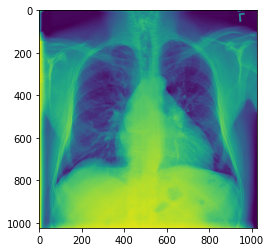

In [ ]:
import pydicom

drive = './'
ds = pydicom.dcmread(drive+'dicom_00000001_000.dcm')

#ピクセルを取り出す（ndarrayとして扱っています）
pixels = ds.pixel_array

#画像として表示してみます。
import matplotlib.pyplot as plt

plt.imshow(pixels)#２つとも必要
plt.show()  


In [ ]:
import pydicom

ds = pydicom.dcmread("dicom_00000001_000.dcm")
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.11129.5.5.153751009835107614666834563294684339746480
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 1.2.0'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.11129.5.5.153751009835107614666834563294684339746480
(0008, 0060) Modality                            CS: 'DX'
(0008, 1030) Study Description                   LO: 'Cardiomegaly'
(0010, 0020) Pati

In [ ]:
from pydicom import Dataset
from pydicom.datadict import add_private_dict_entries


toing_dicom_attr = {
                0x270f03e9: ('OB', 1, 'Was Viewed By TOINGTOING'),
                0x270f03ea: ('OB', 1, 'At Least One toing toing'),
            }
add_private_dict_entries("TOINGSCOMPANY", toing_dicom_attr)
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.11129.5.5.153751009835107614666834563294684339746480
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 1.2.0'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.11129.5.5.153751009835107614666834563294684339746480
(0008, 0060) Modality                            CS: 'DX'
(0008, 1030) Study Description                   LO: 'Cardiomegaly'
(0009, 0003) Priv

In [ ]:
import pydicom

ds = pydicom.dcmread("dicom.dcm")
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 174
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.392.200036.9116.2.5.1.3268.2046999452.1500526393.190314
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.392.200036.9142.1
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: ['', 'ISO 2022 IR 87']
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.392.200036.9116.2.5.1.3268.2046999452.1500526393.190314
(0008, 0020) Study Date                          DA: '20170720'
(0008, 0021) Series Date        

In [ ]:
data = "Các cách sử dụng nâng cao này của hàm range() trong python đều được Kiyoshi biên soạn chi tiết trong bài viết Hàm range() trong python, do đó hãy đừng bỏ qua bài viết này nhé. Tổng kết  Trên đây Kiyoshi đã hướng dẫn bạn về cách sử dụng for i in range python rồi. Để nắm rõ nội dung bài học hơn, bạn hãy thực hành viết lại các ví dụ của ngày hôm nay nhé.  Và hãy cùng tìm hiểu những kiến thức sâu hơn về python trong các bài học tiếp theo.for i in range(5 ):     print(Lượt lặp thứ ,i+1) #> Lượt lặp thứ  1 #> Lượt lặp thứ  2 #> Lượt lặp thứ  3 #> Lượt lặp thứ  4 #> Lượt lặp thứ  5https://laptrinhcanban.com/python/nhap-mon-lap-trinh-python/vong-lap-trong-python/vong-lap-for-range-trong-python/"

In [ ]:
# https://kita-note.com/dicom-add-private-tag
import pydicom

ds = pydicom.dcmread("dicom.dcm")


# add private tag
# ds.add(DataElement(0x00090001, 'SH', 'private data1'))
for i in range(100,1000):
  ds.add_new("0x00090"+str(i), 'UC', data)  
# ds[0x0009, 0x0003] = DataElement(0x00090003, 'OW', ds.pixel_array)

print(ds)
ds.save_as("modified.dcm")

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 174
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.392.200036.9116.2.5.1.3268.2046999452.1500526393.190314
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.392.200036.9142.1
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: ['', 'ISO 2022 IR 87']
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.392.200036.9116.2.5.1.3268.2046999452.1500526393.190314
(0008, 0020) Study Date                          DA: '20170720'
(0008, 0021) Series Date        

/usr/local/lib/python3.7/dist-packages/pydicom/charset.py:538: UserWarning: Failed to encode value with encodings: iso8859, iso2022_jp - using replacement characters in encoded string
  .format(', '.join(encodings)))


In [ ]:
ds.pixel_array

array([[ 905, 1019, 1227, ...,  302,  304,  328],
       [ 628,  770,  907, ...,  298,  331,  355],
       [ 498,  566,  706, ...,  280,  285,  320],
       ...,
       [ 334,  400,  431, ..., 1094, 1068, 1083],
       [ 339,  377,  413, ..., 1318, 1346, 1336],
       [ 378,  374,  422, ..., 1369, 1129,  862]], dtype=int16)